In [1]:
from piazza_api.rpc import PiazzaRPC
from datetime import datetime
import time

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats

In [80]:
#p = PiazzaRPC(classcode) # course
#p.user_login(username, password) # login

In [4]:
def to_time(t): 
    # convert to unix timestamp (in seconds)
    fmt = '%Y-%m-%dT%H:%M:%SZ'
    return time.mktime((datetime.strptime(t, fmt)).timetuple())

In [5]:
def diff_time_minute(t1, t2):
    # subtract and then divide by 60 to get difference minutes.
    return int(abs(t1-t2))/60

## Get data (for individual post)
1st round:
1. check if is a question (type : question)
2. check if fits requested tag (if given one)
3. check creation time
4. check if answered
5. check time for each answer

2nd round
6. return [creation time, student answer time, instructor answer time]
  

In [54]:
def get_timing(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
            
        c_time = to_time(p.content_get(cid)['created']) # time thread is created
        #print(cid)
        #print(p.content_get(cid)["history"][0]['created'])
        s_time = -1 # time thread is resolved by student, -1 if never
        i_time = -1 # time thread is resolved by instructor, -1 if never
        for x in p.content_get(cid)["children"]:
            if (x["type"]=="s_answer"):
                s_time = to_time(x['created'])
                #if (x["type"]=="s_answer" and x["tag_endorse"] != []):
                #    print("\tendorsed")
                #print("\twith latency:")
                #print("\t\t"+str(diff_time(t_c, x['created']))+" minutes")
            if (x["type"]=="i_answer"):
                i_time = to_time(x['created'])
        return [c_time,s_time,i_time]
    except:
        pass # if post does not exist, ignore

## Get data (in batch)

In [55]:
idx_start = 1
idx_end = 200
tag = 'hw1'

t_c_arr = []
t_last = 0

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_timing(i,tag)
    if (t_cur != None):
        if (t_last == 0):
            t_last = t_cur[0]
        t_c_arr.append(t_cur[0]-t_last)
        print(t_cur[0]-t_last)
        t_last = t_cur[0]

print("--- %s seconds ---\n" % (time.time() - start_time))

41
2017-02-01T16:16:24Z
0.0
50
2017-02-05T06:14:24Z
309480.0
58
2017-02-07T20:11:05Z
223001.0
59
2017-02-07T23:05:03Z
10438.0
60
2017-02-08T06:45:45Z
27642.0
67
2017-02-09T03:55:42Z
76197.0
71
2017-02-10T17:26:25Z
135027.0
73
2017-02-10T23:01:37Z
20128.0
74
2017-02-11T01:38:32Z
9415.0
77
2017-02-12T22:18:06Z
160774.0
78
2017-02-12T22:34:00Z
954.0
80
2017-02-13T05:10:23Z
23783.0
82
2017-02-13T15:35:25Z
37502.0
86
2017-02-14T02:28:50Z
39163.0
87
2017-02-14T03:49:56Z
4908.0
88
2017-02-14T03:59:39Z
583.0
89
2017-02-14T06:24:15Z
8676.0
90
2017-02-14T06:34:23Z
608.0
94
2017-02-14T22:24:36Z
57013.0
96
2017-02-14T23:32:39Z
3528.0
97
2017-02-15T00:25:55Z
3751.0
98
2017-02-15T01:55:37Z
5382.0
100
2017-02-15T08:34:23Z
20911.0
101
2017-02-15T07:47:02Z
174.0
106
2017-02-15T21:22:31Z
48929.0
108
2017-02-15T23:22:45Z
7214.0
113
2017-02-28T05:39:25Z
77357.0
118
2017-02-17T05:50:42Z
32320.0
132
2017-02-20T00:13:47Z
238985.0
134
2017-02-20T01:54:02Z
6015.0
196
2017-02-23T20:45:26Z
327084.0
--- 67.086224

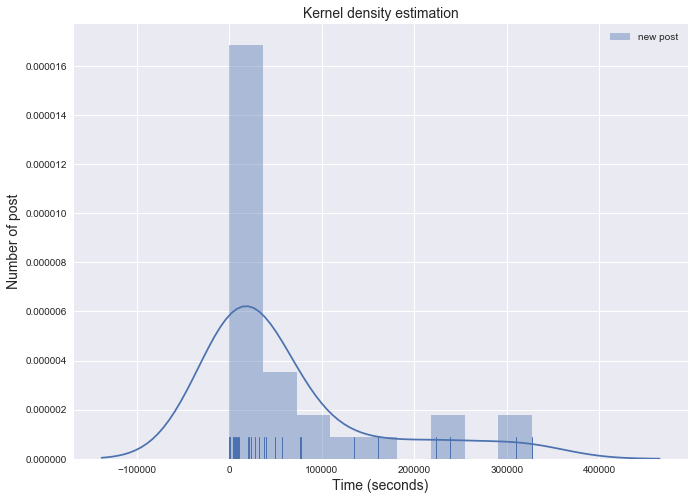

In [56]:
% matplotlib inline

#sns.distplot([t_c_arr,t_s_arr], kde=True, rug=True)
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(t_c_arr, kde=True, rug=True, ax=ax, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

-8.94998379649e-11 61836.8382762


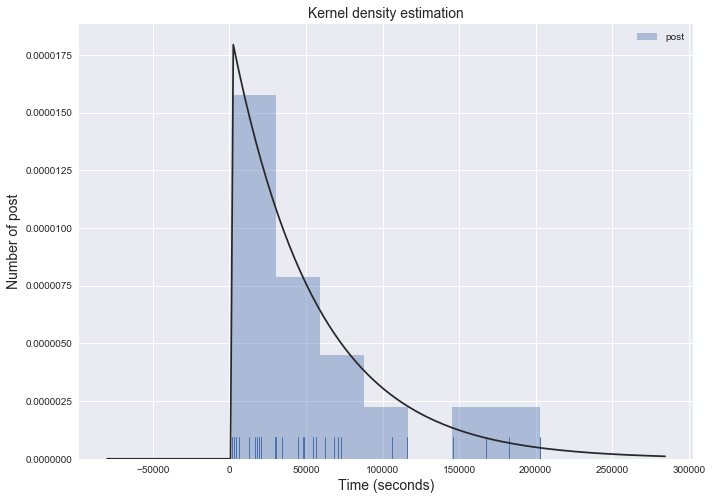

In [71]:
% matplotlib inline

#sns.distplot([t_c_arr,t_s_arr], kde=True, rug=True)
fig, ax = plt.subplots(figsize=(11,8))
#a = stats.expon.rvs(scale=1000000 ,size=100)
#sns.distplot(a, kde=True, rug=True, ax=ax, fit=stats.beta, label = "post")


#sns.distplot(t_c_arr, kde=True, rug=True, ax=ax, fit=stats.expon, label = "new post")

#sns.distplot(t_c_arr, kde=False, rug=True, ax=ax, label = "new post")

loc, scale = stats.expon.fit(t_c_arr)
print(loc,scale)
a = stats.expon.rvs(scale=scale ,size=len(t_c_arr))
sns.distplot(a, kde=False, rug=True, ax=ax, fit=stats.expon, label = "post")


#r = sorted(stats.norm.rvs(loc=0, scale=200000, size=10000))
#sns.distplot(r, label = "fit")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [36]:
np.random.seed(987654321)
a = stats.expon.rvs(scale=1000000 ,size=100)
b = stats.expon.rvs(scale=1000000 ,size=100)
c = stats.expon.rvs(scale=1000000 ,size=100)
stats.ks_2samp(a,c)

Ks_2sampResult(statistic=0.10000000000000003, pvalue=0.67662014970024542)

In [81]:
p.content_get(3370)

{'bookmarked': 2,
 'bucket_name': 'Today',
 'bucket_order': 2,
 'change_log': [{'anon': 'stud',
   'data': 'j22t3j9zwfrdv',
   'type': 'create',
   'when': '2017-04-29T05:08:08Z'},
  {'anon': 'no',
   'data': 'j23ftzh8ydk5gb',
   'to': 'j22t3j9o6qddu',
   'type': 'i_answer',
   'uid': 'is240fz0hug6w2',
   'when': '2017-04-29T15:44:34Z'}],
 'children': [{'bucket_name': 'Today',
   'bucket_order': 2,
   'children': [],
   'config': {},
   'created': '2017-04-29T15:44:34Z',
   'data': {'embed_links': []},
   'folders': [],
   'history': [{'anon': 'no',
     'content': '<p>Try printing out sizeof(argv) with different values, it might not work the way you expect it to work.</p>\n<p></p>\n<p>Try running it through a debugger - which line causes it to break?</p>\n<p></p>\n<p>What data type does result point to? What is its value? Is it also a pointer to valid memory?</p>',
     'created': '2017-04-29T15:44:34Z',
     'subject': '',
     'uid': 'is240fz0hug6w2'}],
   'id': 'j23ftzgwkbf5ga',
  

In [ ]:
plt.clf()

plt.figure(figsize=(11,8))

plt.plot(sorted(a), range(0,len(a)), label='new post') # sns.xkcd_rgb["denim blue"]
plt.plot(sorted(b), range(0,len(b)), label='new post') # sns.xkcd_rgb["denim blue"]
plt.plot(sorted(c), range(0,len(c)), label='new post') # sns.xkcd_rgb["denim blue"]

plt.legend()
plt.show()

In [ ]:
h = []
for i in range(0,len(t_c_arr)):
    s = 10000000*(i+1)
    h.append(stats.expon.rvs(scale=s))


In [ ]:
plt.clf()

plt.figure(figsize=(11,8))

plt.plot(sorted(h), range(0,len(h)), label='new post') # sns.xkcd_rgb["denim blue"]

plt.legend()
plt.show()

## Get data (in batch)
From 1 to (the end) <- manually set
Get all the timing data into a matrix
Plot for each column (post, student answer, instructor answer)

In [72]:
idx_start = 1
idx_end = 200
tag = 'hw1'

t_c_arr = []
t_s_arr = []
t_i_arr = []

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_timing(i,tag)
    if (t_cur != None):
        t_c_arr.append(t_cur[0])
        if (t_cur[1] != -1):
            t_s_arr.append(t_cur[1])
        if (t_cur[2] != -1):
            t_i_arr.append(t_cur[2])

print("--- %s seconds ---\n" % (time.time() - start_time))

#print(t_c_arr)
#print(t_s_arr)
#print(t_i_arr)

41
2017-02-01T16:16:24Z
50
2017-02-05T06:14:24Z
58
2017-02-07T20:11:05Z
59
2017-02-07T23:05:03Z
60
2017-02-08T06:45:45Z
67
2017-02-09T03:55:42Z
71
2017-02-10T17:26:25Z
73
2017-02-10T23:01:37Z
74
2017-02-11T01:38:32Z
77
2017-02-12T22:18:06Z
78
2017-02-12T22:34:00Z
80
2017-02-13T05:10:23Z
82
2017-02-13T15:35:25Z
86
2017-02-14T02:28:50Z
87
2017-02-14T03:49:56Z
88
2017-02-14T03:59:39Z
89
2017-02-14T06:24:15Z
90
2017-02-14T06:34:23Z
94
2017-02-14T22:24:36Z
96
2017-02-14T23:32:39Z
97
2017-02-15T00:25:55Z
98
2017-02-15T01:55:37Z
100
2017-02-15T08:34:23Z
101
2017-02-15T07:47:02Z
106
2017-02-15T21:22:31Z
108
2017-02-15T23:22:45Z
113
2017-02-28T05:39:25Z
118
2017-02-17T05:50:42Z
132
2017-02-20T00:13:47Z
134
2017-02-20T01:54:02Z
196
2017-02-23T20:45:26Z
--- 82.41754794120789 seconds ---



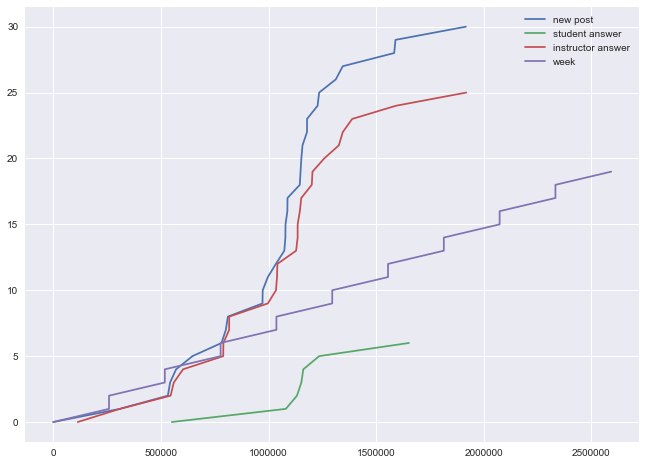

In [76]:
plt.clf()

plt.figure(figsize=(11,8))

t_min = min(t_c_arr)
t_c_arr = [x-t_min for x in t_c_arr]
t_s_arr = [x-t_min for x in t_s_arr]
t_i_arr = [x-t_min for x in t_i_arr]

plt.plot(sorted(t_c_arr), range(0,len(t_c_arr)), label='new post') # sns.xkcd_rgb["denim blue"]
plt.plot(sorted(t_s_arr), range(0,len(t_s_arr)), label='student answer')
plt.plot(sorted(t_i_arr), range(0,len(t_i_arr)), label='instructor answer')

# week
min_per_week = 3*24*60*60
w_begin = t_c_arr[0]
w = []
for x in range(0,10):
    w.append(t_c_arr[0]+x*min_per_week)
    w.append(t_c_arr[0]+(x+1)*min_per_week)
plt.plot(w, range(0,len(w)), label='week')

plt.legend()
plt.show()

In [ ]:
% matplotlib inline

#sns.distplot([t_c_arr,t_s_arr], kde=True, rug=True)
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(t_c_arr, kde=True, rug=True, ax=ax, label = "new post")
sns.distplot(t_s_arr, kde=True, rug=True, ax=ax, label = "student answer")
sns.distplot(t_i_arr, kde=True, rug=True, ax=ax, label = "instructor answer")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

## Referencial Testing

In [ ]:
for i in range(1,10):
    t_mat = []
    t_cur = get_timing(i)
    print (t_cur)

In [77]:
p.content_get(112)

{'bookmarked': 5,
 'bucket_name': 'Today',
 'bucket_order': 2,
 'change_log': [{'anon': 'stud',
   'data': 'iz8rngrmqaq5wi',
   'type': 'create',
   'when': '2017-02-16T19:15:09Z'},
  {'anon': 'stud',
   'data': 'iz8rpvvulie7e3',
   'type': 'update',
   'when': '2017-02-16T19:17:02Z'},
  {'anon': 'stud',
   'data': 'iz8rqmlmnz67ay',
   'type': 'update',
   'when': '2017-02-16T19:17:36Z'},
  {'anon': 'no',
   'to': 'iz8rngqqt4p5wh',
   'type': 'followup',
   'uid': 'is699xqt8ks4bq',
   'when': '2017-02-16T19:23:09Z'},
  {'anon': 'stud',
   'to': 'iz8rngqqt4p5wh',
   'type': 'feedback',
   'when': '2017-02-16T19:28:35Z'},
  {'anon': 'no',
   'data': 'iz8s6uwf7173he',
   'to': 'iz8rngqqt4p5wh',
   'type': 'i_answer',
   'uid': 'idryajwi8w54ni',
   'when': '2017-02-16T19:30:14Z'},
  {'anon': 'no',
   'data': 'iz8s9ewm66s57b',
   'type': 'i_answer_update',
   'uid': 'idryajwi8w54ni',
   'when': '2017-02-16T19:32:13Z'},
  {'anon': 'no',
   'data': 'iz8ufzpaeij44c',
   'type': 'i_answer_updat

## Old functions

In [ ]:
def diff_time(t1, t2):
    fmt = '%Y-%m-%dT%H:%M:%SZ'
    d1 = datetime.strptime(t1, fmt)
    d2 = datetime.strptime(t2, fmt)

    # convert to unix timestamp
    d1_ts = time.mktime(d1.timetuple())
    d2_ts = time.mktime(d2.timetuple())

    # they are now in seconds, subtract and then divide by 60 to get minutes.
    return int(d2_ts-d1_ts)/60

In [ ]:
def get_post_data_verbose(cid):
    t_c = p.content_get(cid)["history"][0]['created']
    print("time thread is created:")
    print("\t"+t_c)
    
    t_a = []
    for x in p.content_get(cid)["children"]:
        if (x["type"]=="s_answer" or x["type"]=="i_answer"):
            t_a.append(x['created'])
            print("\ntime thread is resolved:")
            print("\t"+x["type"])
            print("\t"+x['created'])
            if (x["type"]=="s_answer" and x["tag_endorse"] != []):
                print("\tendorsed")
            print("\twith latency:")
            print("\t\t"+str(diff_time(t_c, x['created']))+" minutes")

In [ ]:
def get_post_data(cid):
    t_c = p.content_get(cid)["history"][0]['created'] # time thread is created
    t_a = [] # time thread is resolved
    for x in p.content_get(cid)["children"]:
        if (x["type"]=="s_answer" or x["type"]=="i_answer"):
            t_a.append(x['created'])
            print("\ntime thread is resolved:")
            print("\t"+x["type"])
            print("\t"+x['created'])
            if (x["type"]=="s_answer" and x["tag_endorse"] != []):
                print("\tendorsed")
            print("\twith latency:")
            print("\t\t"+str(diff_time(t_c, x['created']))+" minutes")